# Q4-Linear classifier (linear networks)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

path=r"C:\Unipi-CS\5ο εξάμηνο\Αναγνώριση Προτύπων\project\Data\original dataset\crimes.csv"

data=pd.read_csv(path)

In [2]:
train_df=data[data["split"]=="TRAIN"]
val_df=data[data["split"]=="VAL"]

In [3]:
categorical_features = ["weapon_code", "scene_type", "weather", "vic_gender"]
continuous_features = ["hour_float", "latitude", "longitude", "victim_age", "temp_c", "humidity", "dist_precinct_km", "pop_density"]

Alpha: 0.01 -> VAL Accuracy: 0.8674

Best Alpha found: 0.01 with Accuracy: 0.8674


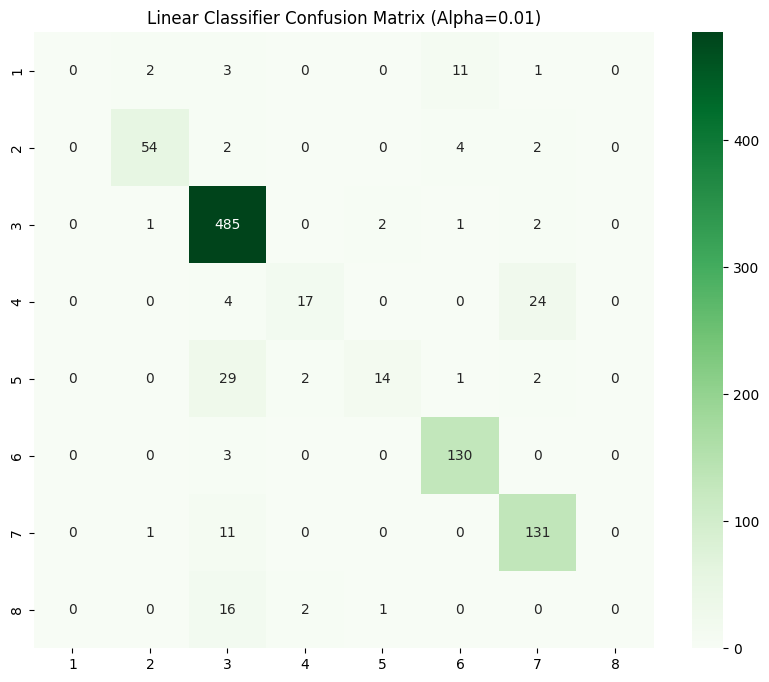

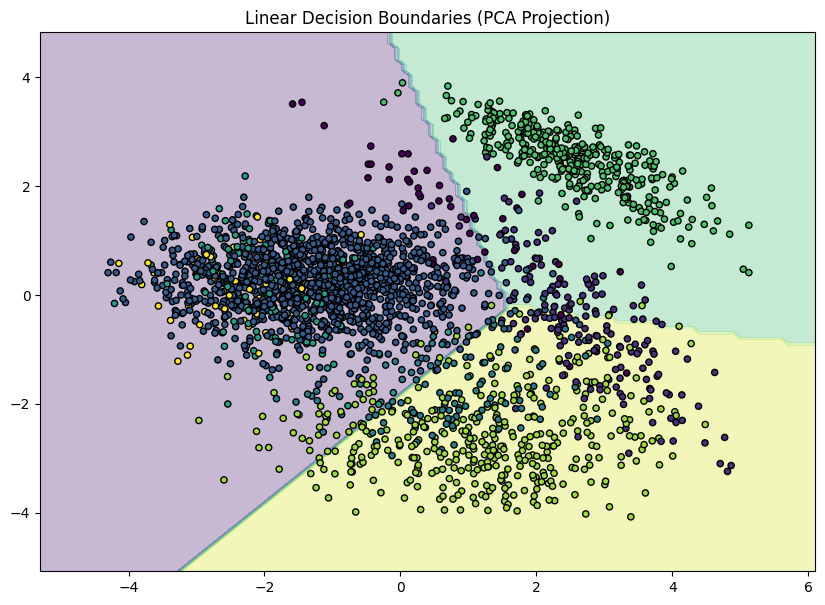

Alpha: 0.1 -> VAL Accuracy: 0.8674

Best Alpha found: 0.01 with Accuracy: 0.8674


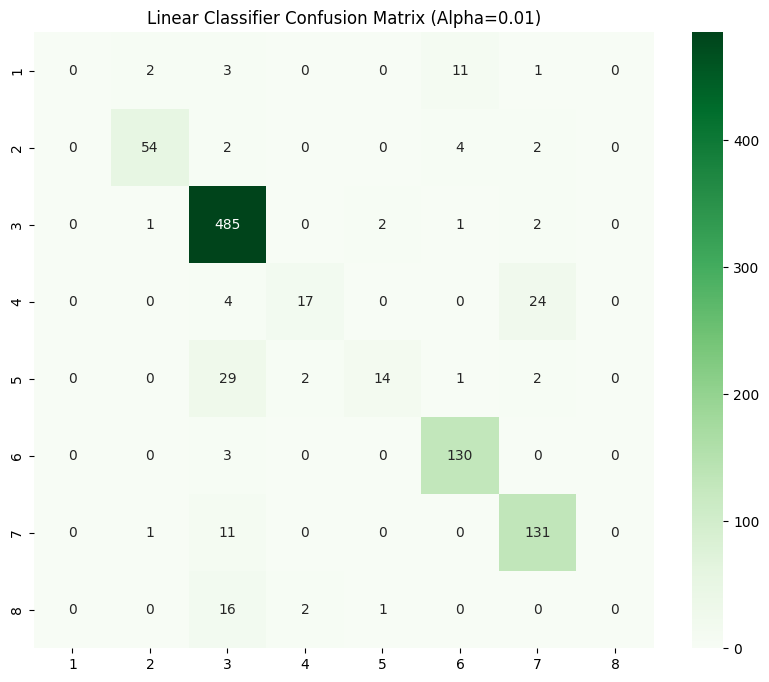

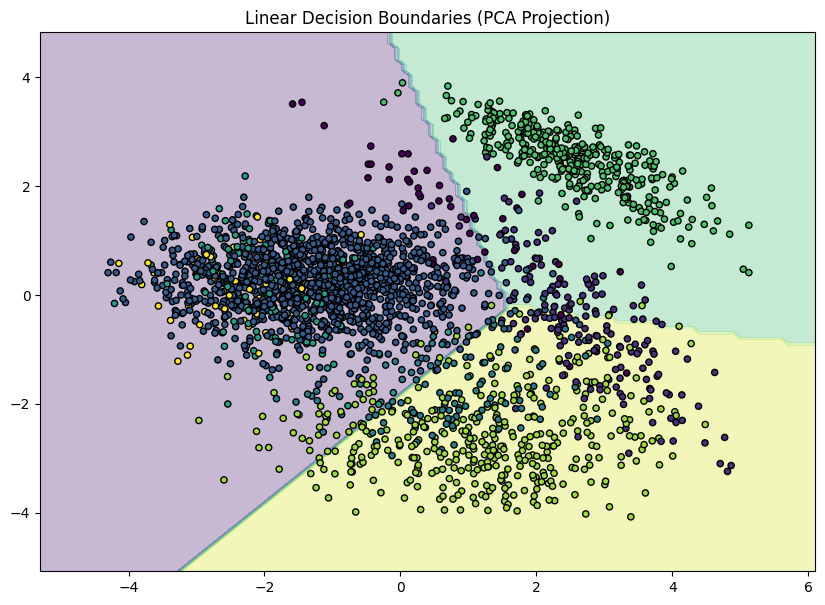

Alpha: 1 -> VAL Accuracy: 0.8674

Best Alpha found: 0.01 with Accuracy: 0.8674


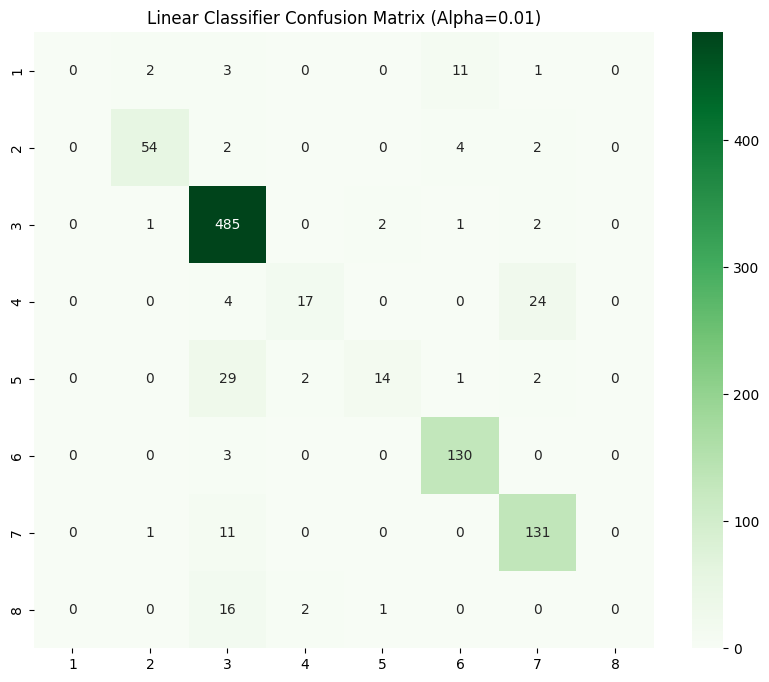

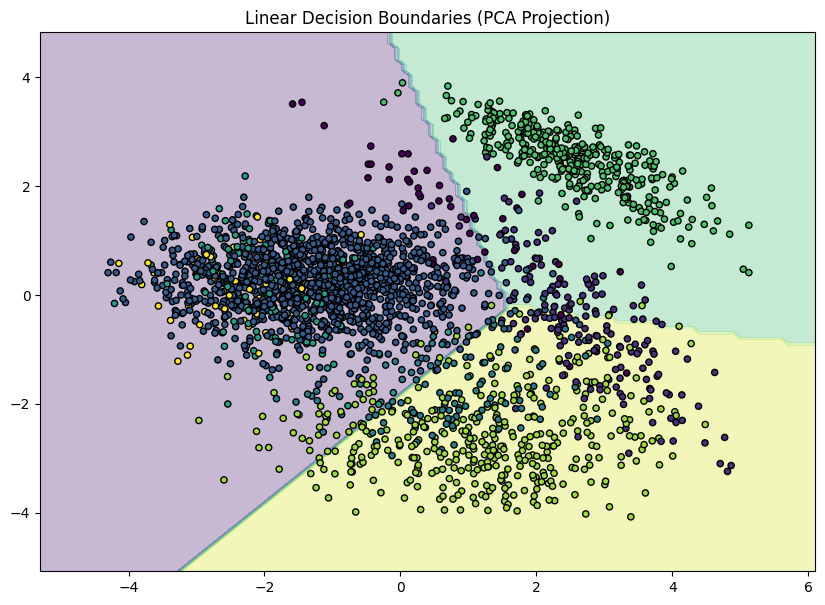

Alpha: 10 -> VAL Accuracy: 0.8653

Best Alpha found: 0.01 with Accuracy: 0.8674


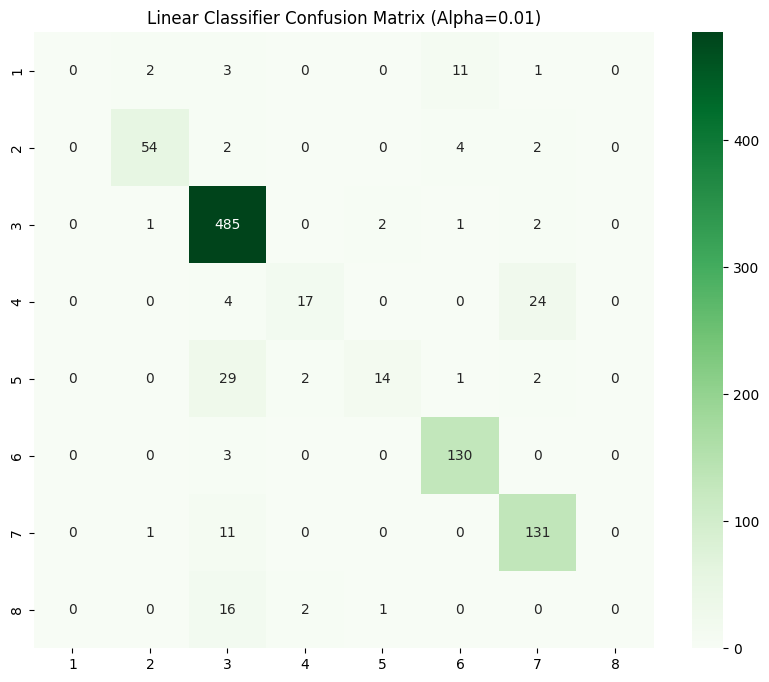

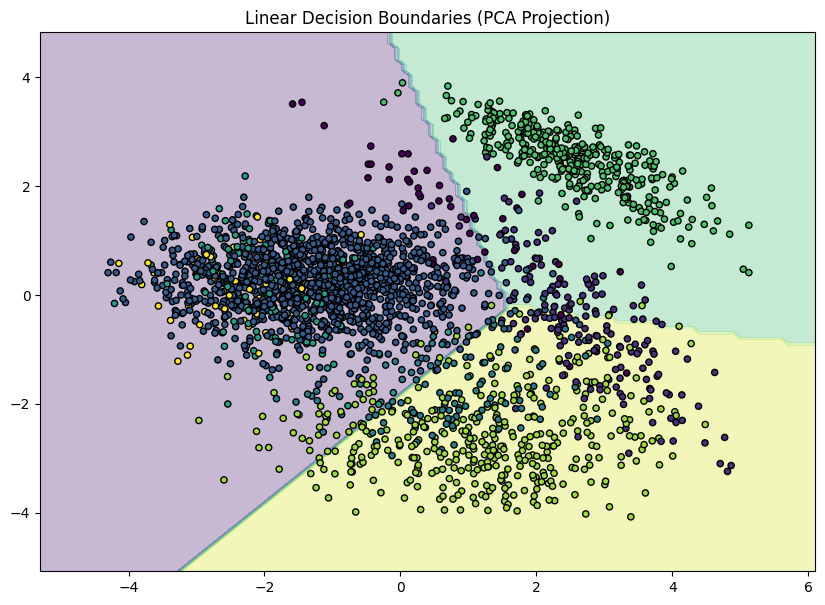

Alpha: 100 -> VAL Accuracy: 0.8580

Best Alpha found: 0.01 with Accuracy: 0.8674


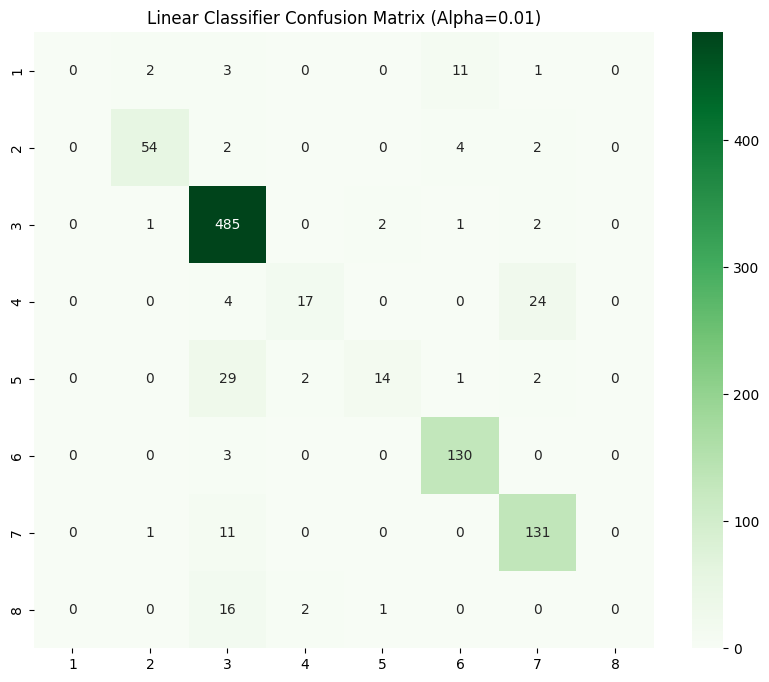

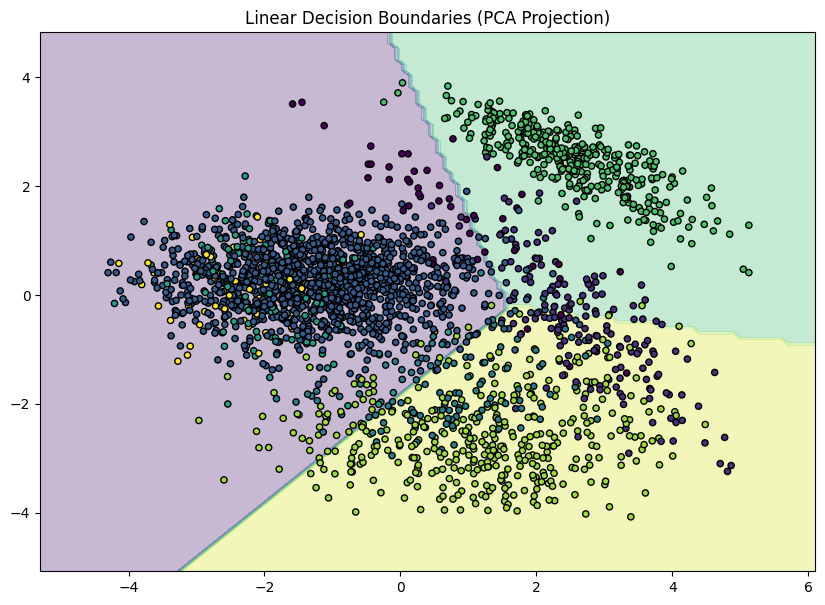

In [4]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler=StandardScaler()
encoder.fit(train_df[categorical_features])
    
X_cat_train = encoder.transform(train_df[categorical_features])
X_cat_val = encoder.transform(val_df[categorical_features])
    
X_train_cont = scaler.fit_transform(train_df[continuous_features])
X_val_cont = scaler.transform(val_df[continuous_features])
    
X_train_final = np.hstack([X_train_cont, X_cat_train])
X_val_final = np.hstack([X_val_cont, X_cat_val])
        
target_encoder = OneHotEncoder(sparse_output=False)
Y_train = target_encoder.fit_transform(train_df[["killer_id"]])
Y_val_labels = val_df["killer_id"].values
    
alphas=[0.01,0.1,1,10,100]
best_acc=0
best_model=None
    
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_final, Y_train)

    y_pred_scores = model.predict(X_val_final)
    y_pred_idx = np.argmax(y_pred_scores, axis=1)
    predicted_killers = target_encoder.categories_[0][y_pred_idx]
        
    acc = accuracy_score(Y_val_labels, predicted_killers)
    print(f"Alpha: {a} -> VAL Accuracy: {acc:.4f}")
        
    if acc > best_acc:
            best_acc = acc
            best_alpha = a
            best_model = model

    print(f"\nBest Alpha found: {best_alpha} with Accuracy: {best_acc:.4f}")

    final_preds = target_encoder.categories_[0][np.argmax(best_model.predict(X_val_final), axis=1)]
    cm = confusion_matrix(Y_val_labels, final_preds)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=target_encoder.categories_[0], 
                yticklabels=target_encoder.categories_[0])
    plt.title(f"Linear Classifier Confusion Matrix (Alpha={best_alpha})")
    plt.show()

   
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_final)
    

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    

    grid_points_2d = np.c_[xx.ravel(), yy.ravel()]
    grid_points_full = pca.inverse_transform(grid_points_2d)
    

    grid_preds_scores = best_model.predict(grid_points_full)
    grid_preds_idx = np.argmax(grid_preds_scores, axis=1)

    Z = grid_preds_idx.reshape(xx.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df["killer_id"], edgecolor='k', s=20, cmap='viridis')
    plt.title("Linear Decision Boundaries (PCA Projection)")
    plt.show()